# Initialization vs Isometry

In qiskit you may prepare a state using 2 ways:
- reset to 0 and apply the 2004 [state preparation algorithm](https://arxiv.org/abs/quant-ph/0406176).
- run an [isometry](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.isometry.html): transformation of the given state into the desired by a [pretty fresh 2020 algorithm](https://arxiv.org/abs/1501.06911).

In [ ]:
!pip install --upgrade qiskit

In [2]:
import numpy as np
from qiskit import QuantumCircuit, BasicAer, execute, transpile

# some data
data = np.array(range(16))
data = data / np.linalg.norm(data)
print(np.round_(data, 3))

[0.    0.028 0.057 0.085 0.114 0.142 0.17  0.199 0.227 0.256 0.284 0.312
 0.341 0.369 0.398 0.426]


## Initialize

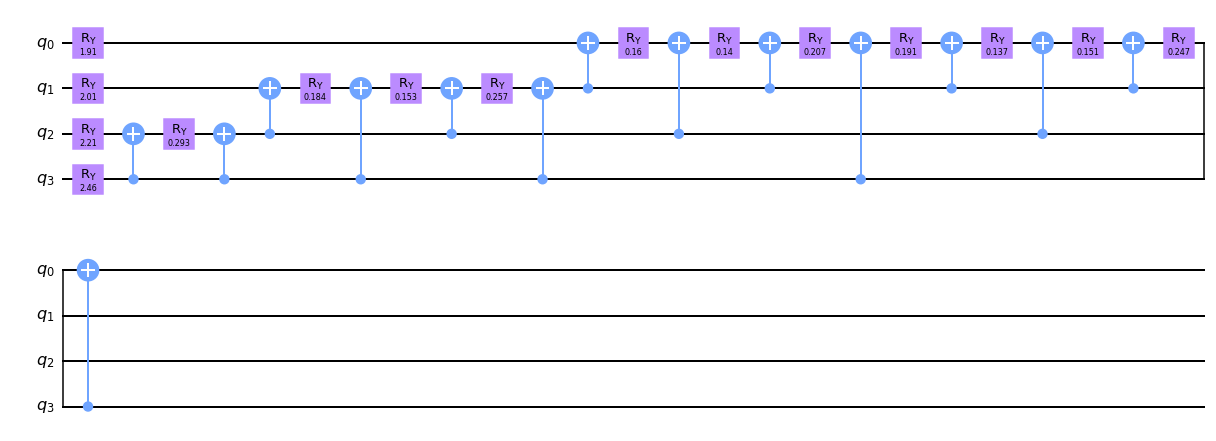

In [3]:
initqc = QuantumCircuit(4)
initqc.initialize(data)
transpile(initqc, BasicAer.get_backend('qasm_simulator'), basis_gates=['cx', 'ry']).draw('mpl')

In [4]:
transpile(initqc, BasicAer.get_backend('qasm_simulator')).count_ops()['cx']

14

In [5]:
init_sv = execute(initqc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()

# both vectors are equal
assert np.allclose(init_sv, data)

## And now isometry!

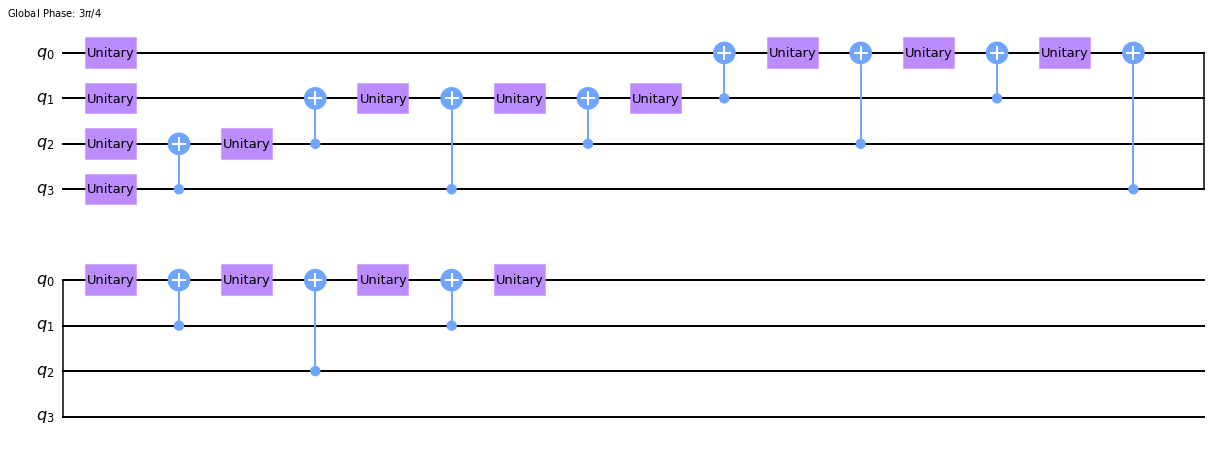

In [6]:
isoqc = QuantumCircuit(4)

# derived from https://qiskit.org/documentation/stubs/qiskit.algorithms.linear_solvers.HHL.html
isoqc.isometry(data, list(range(4)), None)
transpile(isoqc, BasicAer.get_backend('qasm_simulator')).draw('mpl')

In [7]:
transpile(isoqc, BasicAer.get_backend('qasm_simulator')).count_ops()['cx']

11

In [8]:
iso_sv = execute(isoqc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()

# the vector may have a global phase applied, 
# behaivour is unstable
print(np.round_(iso_sv, 4))
print()
global_phase =  iso_sv[-1] / abs(iso_sv[-1])
print("phase: ", global_phase)
print(np.round_(iso_sv * np.conj(global_phase), 4))

from qiskit.quantum_info import state_fidelity

state_fidelity(iso_sv, data)
# this will fail due to the global phase
# assert np.allclose(iso_sv, data)

[0.    +0.j 0.0284-0.j 0.0568-0.j 0.0852-0.j 0.1136-0.j 0.142 -0.j
 0.1704+0.j 0.1988-0.j 0.2272-0.j 0.2556-0.j 0.284 +0.j 0.3124-0.j
 0.3408-0.j 0.3692-0.j 0.3976-0.j 0.426 -0.j]

phase:  (1-2.579141390646587e-17j)
[0.    +0.j 0.0284-0.j 0.0568-0.j 0.0852-0.j 0.1136-0.j 0.142 -0.j
 0.1704+0.j 0.1988-0.j 0.2272-0.j 0.2556-0.j 0.284 +0.j 0.3124-0.j
 0.3408-0.j 0.3692-0.j 0.3976-0.j 0.426 +0.j]


1.0000000000000018